<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# DW Assignment 2, Lim Wee Liang Kelven, S10221788K

# Table of Contents <a id = "toc"></a>

### 1. [Code](#c)

- [Problem Formulation](#c1)
- [Data Wrangling on multiple tables](#c2)
- [Data Cleansing and Transformation](#c3)
- [Machine Learning Modelling](#c4)

### 2. [Report](#r)

- [Value Based Problem Statement](#r1)
- [Problem Formulation](#r2)
- [Data Wrangling on multiple tables](#r3)
- [Data Cleansing and Transformation](#r4)
- [Machine Learning Modelling](#r5)
- [Summary](#r6)

# Code <a id = "c"></a>
[Back to beginning](#toc)

### 1. [Problem Formulation](#c1)
- [1.1 Importing libraries](#c1.1)
- [1.2 Load and explore the data](#c1.2)


### 2. [Data Wrangling on multiple tables](#c2)


### 3. [Data Cleansing and Transformation](#c3)
- [3.1 Missing value imputation](#c3.1)
- [3.2 Train-Test split](#c3.2)
- [3.3 Numerical Data Transformation](#c3.3)
- [3.4 Binning / Discretiser](#c3.4)
- [3.5 Feature Engineering](#c3.5)
- [3.6 PCA Analysis](#c3.6)


### 4. [Machine Learning Modelling](#c4)
- [4.1 Final row and column count](#c4.1)
- [4.2 Naive Baseline Model](#c4.2)
- [4.3 Linear Regression Model](#c4.3)

# 1. Problem Formulation <a id = "c1"></a>
[Back to top](#c)

## 1.1 Importing Libraries <a id = "c1.1"></a>
[Back to top](#c)

In [1]:
# import the packages
import pandas as pd
import numpy as np

# from sklearn
from sklearn.model_selection import train_test_split

# from feature engine
from feature_engine.transformation import PowerTransformer
from feature_engine.discretisation import EqualFrequencyDiscretiser

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning model
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

## 1.2 Load and Explore the Data <a id = "c1.2"></a>
[Back to top](#c)

In [2]:
# load the dataset and show the info of dataset
driver_standings = pd.read_csv('./f1db_csv_mod/driver_standings_mod.csv')
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0


In [3]:
lap_times = pd.read_csv('./f1db_csv_mod/lap_times_mod.csv')
lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [4]:
pit_stops = pd.read_csv('./f1db_csv_mod/pit_stops_mod.csv')
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


# 2. Data Wrangling on multiple tables <a id = "c2"></a>
[Back to top](#c)

In [5]:
# Merge driver_standings and lap_times
df_1 = pd.merge(driver_standings, lap_times, on = ["raceId", "driverId"], how = "inner").drop_duplicates()
df_1

,driverStandingsId,raceId,driverId,points,position_x,positionText,wins,lap,position_y,time,milliseconds
0,1,18,1,10,1,1,1,1,1,2:01.465,121465
1,1,18,1,10,1,1,1,2,1,2:32.471,152471
2,1,18,1,10,1,1,1,3,1,1:29.257,89257
3,1,18,1,10,1,1,1,4,1,1:28.614,88614
4,1,18,1,10,1,1,1,5,1,1:28.556,88556
...,...,...,...,...,...,...,...,...,...,...,...
508241,70758,1073,4,81,10,10,0,54,9,2:32.020,152020
508242,70758,1073,4,81,10,10,0,55,9,2:25.226,145226
508243,70758,1073,4,81,10,10,0,56,8,1:59.466,119466
508244,70758,1073,4,81,10,10,0,57,8,1:28.007,88007


In [6]:
# Merge df_2 and pit_stops
df_2 = pd.merge(df_1, pit_stops, on = ["raceId", "driverId"], how = "inner").drop_duplicates()
df_2

,driverStandingsId,raceId,driverId,points,position_x,positionText,wins,lap_x,position_y,time_x,milliseconds_x,stop,lap_y,time_y,duration,milliseconds_y
0,68160,969,830,10,5,5,0,1,5,1:38.375,98375,1,25,16:43:56,22.208,22208
1,68160,969,830,10,5,5,0,2,5,1:30.829,90829,1,25,16:43:56,22.208,22208
2,68160,969,830,10,5,5,0,3,5,1:30.490,90490,1,25,16:43:56,22.208,22208
3,68160,969,830,10,5,5,0,4,5,1:29.988,89988,1,25,16:43:56,22.208,22208
4,68160,969,830,10,5,5,0,5,5,1:29.904,89904,1,25,16:43:56,22.208,22208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507767,70758,1073,4,81,10,10,0,54,9,2:32.020,152020,1,36,17:58:06,21.304,21304
507768,70758,1073,4,81,10,10,0,55,9,2:25.226,145226,1,36,17:58:06,21.304,21304
507769,70758,1073,4,81,10,10,0,56,8,1:59.466,119466,1,36,17:58:06,21.304,21304
507770,70758,1073,4,81,10,10,0,57,8,1:28.007,88007,1,36,17:58:06,21.304,21304


In [7]:
# drop positionText, time_x, and duration columns

# positionText is the same as position but String, so it is redundant

# time_x and duration are also redundant because lap_tim(min) and duration(s) exist

# Categorical columns like driverStandingsId, raceId, and driverId are removed

# Columns lap_x, lap_y, and time_y are removed because they are unimportant factors affecting points.

df_2 = df_2.drop(columns = ["driverStandingsId", "raceId", "driverId", "lap_x", "lap_y",
                            "positionText", "time_x", "time_y", "duration"])
df_2

,points,position_x,wins,position_y,milliseconds_x,stop,milliseconds_y
0,10,5,0,5,98375,1,22208
1,10,5,0,5,90829,1,22208
2,10,5,0,5,90490,1,22208
3,10,5,0,5,89988,1,22208
4,10,5,0,5,89904,1,22208
...,...,...,...,...,...,...,...
507767,81,10,0,9,152020,1,21304
507768,81,10,0,9,145226,1,21304
507769,81,10,0,8,119466,1,21304
507770,81,10,0,8,88007,1,21304


In [8]:
# Rename columns
df_2 = df_2.rename(columns = {"position_x":"driver_standings_position", "position_y":"race_position",
                              "milliseconds_x":"lap_time(ms)", "milliseconds_y":"pit_stop_duration(ms)"})
df_2

,points,driver_standings_position,wins,race_position,lap_time(ms),stop,pit_stop_duration(ms)
0,10,5,0,5,98375,1,22208
1,10,5,0,5,90829,1,22208
2,10,5,0,5,90490,1,22208
3,10,5,0,5,89988,1,22208
4,10,5,0,5,89904,1,22208
...,...,...,...,...,...,...,...
507767,81,10,0,9,152020,1,21304
507768,81,10,0,9,145226,1,21304
507769,81,10,0,8,119466,1,21304
507770,81,10,0,8,88007,1,21304


In [9]:
# Create new columns to replace millisecond columns
# lap_time
df_2["lap_time(s)"] = df_2["lap_time(ms)"] / 1000
df_2 = df_2.drop(columns = ["lap_time(ms)"])

# pit_stop_duration
df_2["pit_stop_duration(s)"] = df_2["pit_stop_duration(ms)"] / 1000
df_2 = df_2.drop(columns = ["pit_stop_duration(ms)"])

df_2

,points,driver_standings_position,wins,race_position,stop,lap_time(s),pit_stop_duration(s)
0,10,5,0,5,1,98.375,22.208
1,10,5,0,5,1,90.829,22.208
2,10,5,0,5,1,90.490,22.208
3,10,5,0,5,1,89.988,22.208
4,10,5,0,5,1,89.904,22.208
...,...,...,...,...,...,...,...
507767,81,10,0,9,1,152.020,21.304
507768,81,10,0,9,1,145.226,21.304
507769,81,10,0,8,1,119.466,21.304
507770,81,10,0,8,1,88.007,21.304


# 3. Data Cleansing and Transformation <a id = "c3"></a>
[Back to top](#c)

## 3.1 Missing Value Imputation <a id = "c3.1"></a>
[Back to top](#c)

In [10]:
# Check number of rows and column data type
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507772 entries, 0 to 507771
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   points                     507244 non-null  object 
 1   driver_standings_position  507772 non-null  int64  
 2   wins                       507772 non-null  int64  
 3   race_position              507772 non-null  int64  
 4   stop                       507772 non-null  int64  
 5   lap_time(s)                507772 non-null  float64
 6   pit_stop_duration(s)       507772 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 31.0+ MB


In [11]:
# Check for null values
df_2.isnull().any()

points                        True
driver_standings_position    False
wins                         False
race_position                False
stop                         False
lap_time(s)                  False
pit_stop_duration(s)         False
dtype: bool

In [12]:
# Replace null values in points
df_2['points'] = df_2['points'].fillna(0)
df_2.isnull().any()

points                       False
driver_standings_position    False
wins                         False
race_position                False
stop                         False
lap_time(s)                  False
pit_stop_duration(s)         False
dtype: bool

In [13]:
# Convert data type of "points" from Object to float
try:
    df_2["points"] = df_2["points"].astype(float)
except Exception as e:
    print(e)

could not convert string to float: 'O'


As shown above, `df_2["points"] = df_2["points"].astype(float)` returns an error because there are O's instead of 0's in the data.

To solve this issue, the O's must first be replaced by 0's, then convert the column's data type.

In [14]:
# First, replace O's with 0's
df_2['points'] = df_2['points'].replace("O", 0)

# Next, convert data type of "points" from Object to float
df_2["points"] = df_2["points"].astype(float)

In [15]:
# Check data again
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507772 entries, 0 to 507771
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   points                     507772 non-null  float64
 1   driver_standings_position  507772 non-null  int64  
 2   wins                       507772 non-null  int64  
 3   race_position              507772 non-null  int64  
 4   stop                       507772 non-null  int64  
 5   lap_time(s)                507772 non-null  float64
 6   pit_stop_duration(s)       507772 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 31.0 MB


## 3.2 Train-Test Split <a id = "c3.2"></a>
[Back to top](#c)

In [16]:
# let's separate into training (70%) and testing (30%) set
X_train, X_test, y_train, y_test = train_test_split(
    df_2.drop('driver_standings_position', axis = 1), 
    df_2['driver_standings_position'], 
    test_size = 0.3, 
    random_state = 0)

X_train.shape, X_test.shape

((355440, 6), (152332, 6))

In [17]:
# Find numerical columns
num_cols = [n for n in X_train.columns if X_train[n].dtypes != 'O']
num_cols

['points',
 'wins',
 'race_position',
 'stop',
 'lap_time(s)',
 'pit_stop_duration(s)']

In [18]:
cat_cols = [n for n in X_train.columns if X_train[n].dtypes == 'O']
cat_cols

[]

In [19]:
# Create method to show numerical data distribution
def diagnostic_plots(df, variable):

    # define figure size
    plt.figure(figsize = (16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.title('Q-Q Plot')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


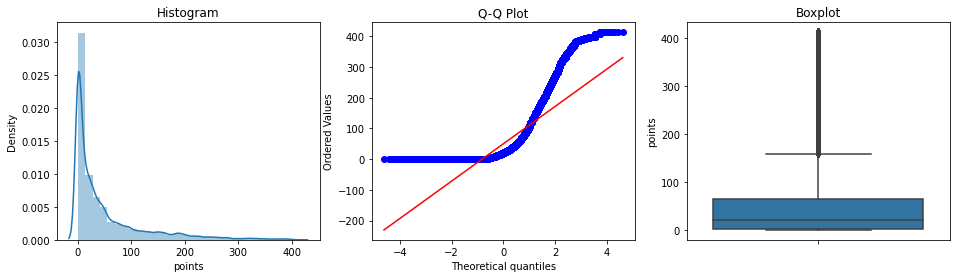

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


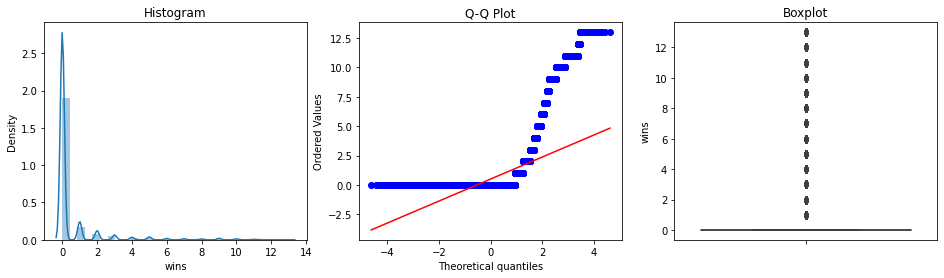

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


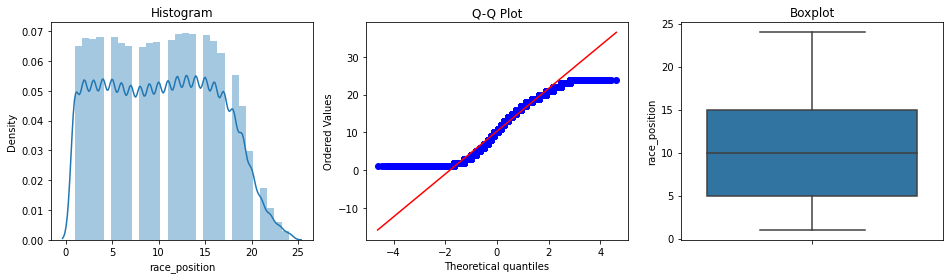

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


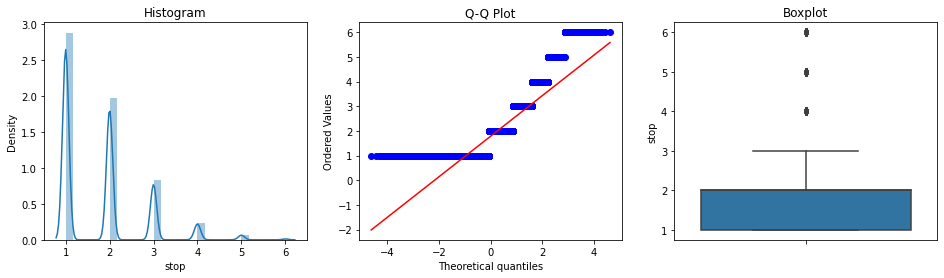

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


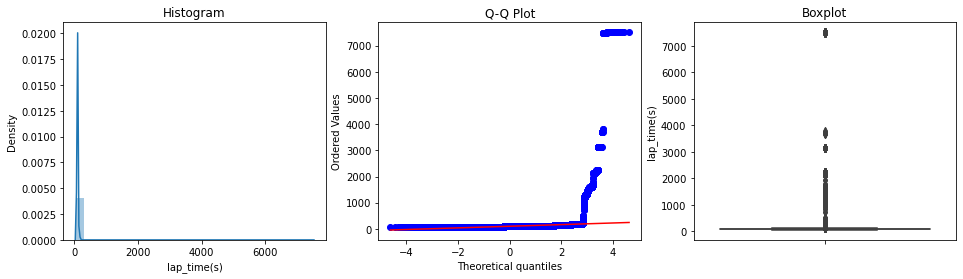

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


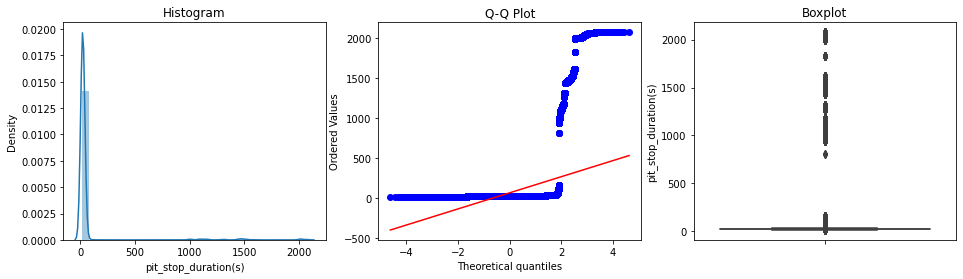

In [20]:
for i in num_cols:
    diagnostic_plots(X_train, i)

## 3.3 Numerical Data Transformation <a id = "c3.3"></a>
[Back to top](#c)

In [21]:
# Numerical Transformation
# This is Power transformation (square root)

# initialize the transformer with a subset of variables to transform
pt = PowerTransformer(variables = num_cols, exp = 1/2)

# fit transformer to the dataframe
pt.fit(X_train)

# transform indicated variables
X_train_pt = pt.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


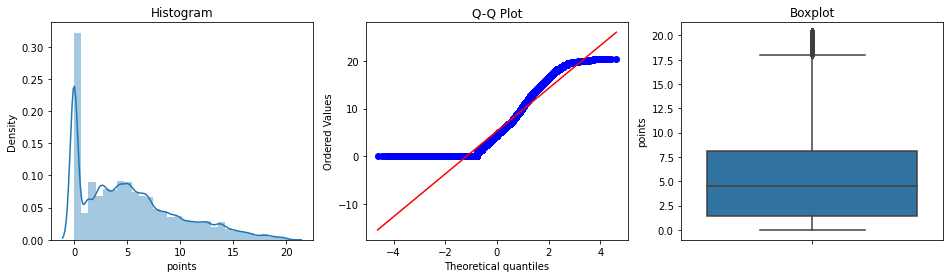

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


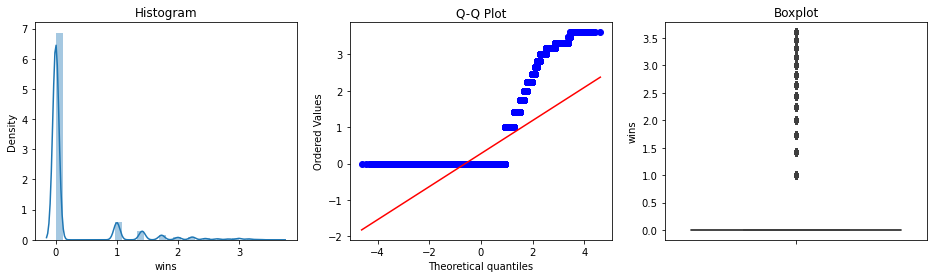

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


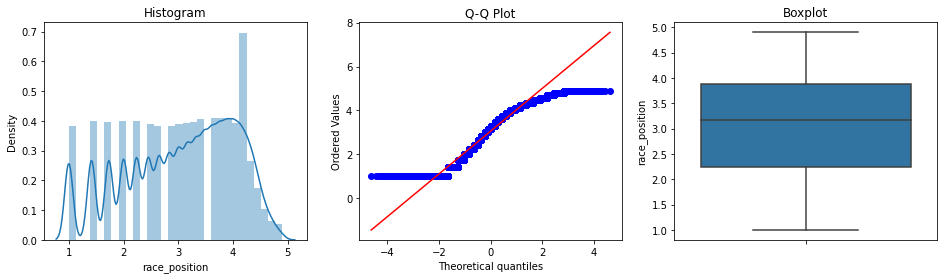

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


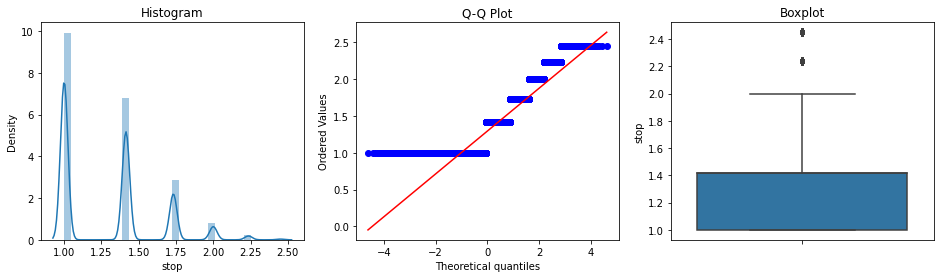

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


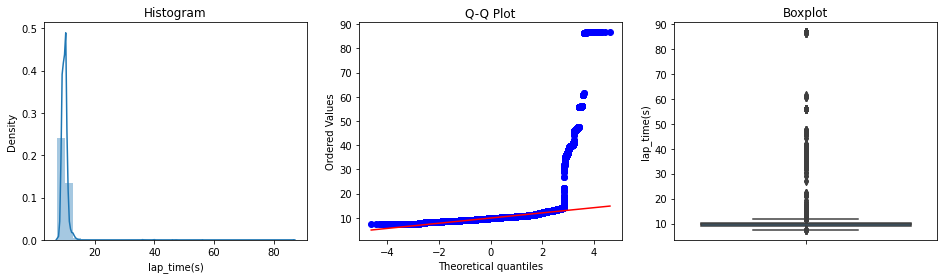

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


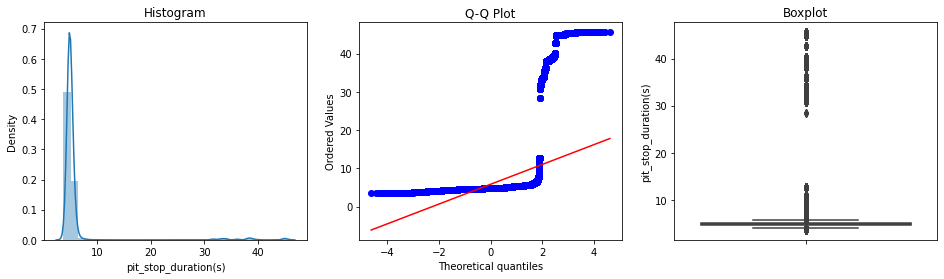

In [22]:
for i in num_cols:
    diagnostic_plots(X_train_pt, i)

## 3.4 Binning / Discretiser <a id = "c3.4"></a>
[Back to top](#c)

In [23]:
# Discretisize data

# EqualWidthDiscretiser returns a slightly worse ML score

# Create discretiser
disc = EqualFrequencyDiscretiser(variables = num_cols)

# Fit discretiser
disc.fit(X_train_pt)

# Fit train and test sets
train_t = disc.transform(X_train_pt)
test_t = disc.transform(X_test)

In [24]:
# Create a method to calculate and show the proportion of observations per interval
def ShowProportions(category, train_set, test_set):
    
    # calculate proportion of observations per interval
    t1 = train_set.groupby(category)[category].count() / len(train_set)
    t2 = test_set.groupby(category)[category].count() / len(test_set)

    # concatenate aggregated views
    tmp = pd.concat([t1, t2], axis = 1)
    tmp.columns = ['train', 'test']

    # plot
    tmp.plot.bar()
    plt.xticks(rotation = 0)
    plt.ylabel('Percentage of observations per bin')

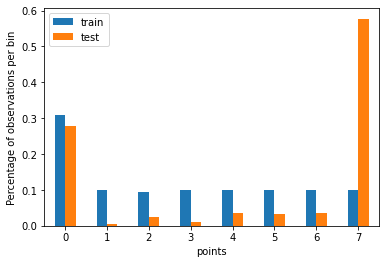

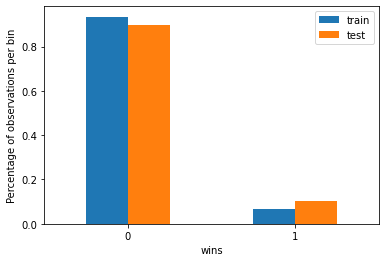

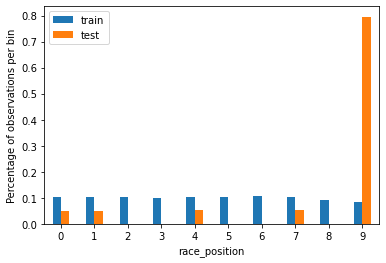

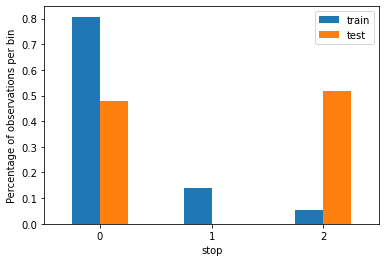

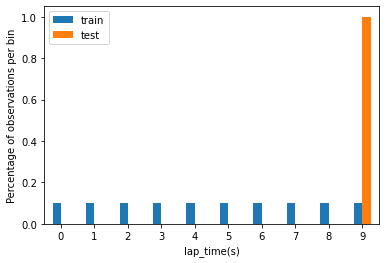

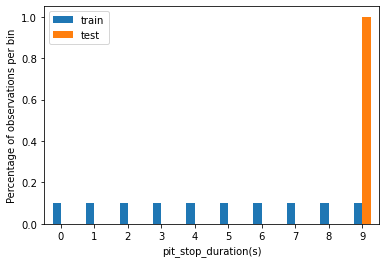

In [25]:
for i in num_cols:
    ShowProportions(i, train_t, test_t)

## 3.5 Feature Engineering <a id = "c3.5"></a>
[Back to top](#c)

In [26]:
# Feature scaling

# This is mean normalisation

# Calculate the mean
means = train_t.mean(axis = 0)

# Calculate the range
ranges = train_t.max(axis = 0) - train_t.min(axis = 0)

# Create X_train_scaled and X_test_scaled
X_train_scaled = (train_t - means) / ranges
X_test_scaled = (test_t - means) / ranges

In [27]:
def PlotScale(train_set, column_name, train_scaled):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))
    
    for column in column_name:
        sns.kdeplot(train_set[column], ax = ax1, label = column)
        sns.kdeplot(train_scaled[column], ax = ax2, label = column)

    # before scaling
    ax1.set_title('Before Scaling')
    ax1.legend()

    # after scaling
    ax2.set_title('After Scaling')
    ax2.legend()
    
    plt.show()

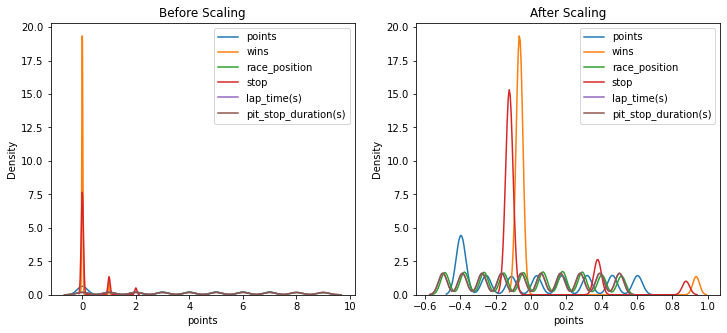

In [28]:
PlotScale(train_t, num_cols, X_train_scaled)

## 3.6 PCA Analysis <a id = "c3.6"></a>
[Back to top](#c)

In [29]:
# set up the PCA
pca = PCA()

# train the PCA
pca.fit(X_train_scaled)

# create the principal components
pca_train = pca.transform(X_train_scaled)
pca_test = pca.transform(X_test_scaled)

In [30]:
# Show the number of PCs
print(len(pca.explained_variance_ratio_))

# Show the variance explanation for each PC
print(pca.explained_variance_ratio_)

6
[0.37444896 0.20808399 0.14883438 0.12401109 0.08449205 0.06012954]


Text(0, 0.5, 'Percentage of Variance Explained')

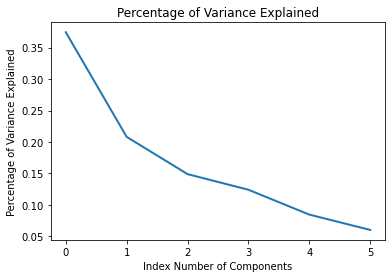

In [31]:
plt.plot(pca.explained_variance_ratio_, linewidth = 2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Index Number of Components')
plt.ylabel('Percentage of Variance Explained')

# 4. Machine Learning Modelling <a id = "c4"></a>
[Back to top](#c)

## 4.1 Final Row and Column Count <a id = "c4.1"></a>
[Back to top](#c)

In [32]:
final_X_train = X_train_scaled
final_X_test = X_test_scaled

In [33]:
final_X_train.shape, final_X_test.shape

((355440, 6), (152332, 6))

## 4.2 Naive Baseline Model <a id = "c4.2"></a>
[Back to top](#c)

In [34]:
# pick the mean target value from all of train data
mean_target_value = y_train.mean()
print(mean_target_value)
print("The train mean target value is", round(mean_target_value, 2))

11.14011928876885
The train mean target value is 11.14


In [35]:
y_train_preds_naive = [round(mean_target_value, 2) for row in final_X_train.iloc[:, 0]]
y_train_preds_naive[0:5]

[11.14, 11.14, 11.14, 11.14, 11.14]

In [36]:
y_test_preds_naive = [round(mean_target_value, 2) for row in final_X_test.iloc[:, 0]]
y_test_preds_naive[0:5]

[11.14, 11.14, 11.14, 11.14, 11.14]

In [37]:
# Mean Squared Error (the lower the better, 0 is best possible score)

y_train_true = y_train
y_train_pred = y_train_preds_naive

y_test_true = y_test
y_test_pred = y_test_preds_naive

# train MSE score
train_mse_naive = mean_squared_error(y_train_true, y_train_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
test_mse_naive = mean_squared_error(y_test_true, y_test_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()


# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
train_rmse_naive = mean_squared_error(y_train_true, y_train_pred, squared = False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
test_rmse_naive = mean_squared_error(y_test_true, y_test_pred, squared = False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")
print()


# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
train_r2_naive = r2_score(y_train_true, y_train_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
test_r2_naive = r2_score(y_test_true, y_test_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 41.52.
The Naive Baseline Model's MSE on test data is 41.52.

The Naive Baseline Model's RMSE on train data is 6.44.
The Naive Baseline Model's RMSE on test data is 6.44.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


## 4.3 Linear Regression Model <a id = "c4.3"></a>
[Back to top](#c)

In [38]:
linreg = LinearRegression().fit(final_X_train, y_train)

y_train_preds_linreg = linreg.predict(final_X_train)
y_test_preds_linreg = linreg.predict(final_X_test)

In [39]:
# Mean Squared Error (the lower the better, 0 is best possible score)

y_train_true = y_train
y_train_pred = y_train_preds_linreg

y_test_true = y_test
y_test_pred = y_test_preds_linreg

# train MSE score
train_mse_linreg = mean_squared_error(y_train_true, y_train_pred)
print(f"The LinReg Model's MSE on train data is {train_mse_linreg:.4f}.")

# test MSE score
test_mse_linreg = mean_squared_error(y_test_true, y_test_pred)
print(f"The LinReg Model's MSE on test data is {test_mse_linreg:.4f}.")
print()


# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
train_rmse_linreg = mean_squared_error(y_train_true, y_train_pred, squared = False)
print(f"The LinReg Model's RMSE on train data is {train_rmse_linreg:.4f}.")

# test RMSE score
test_rmse_linreg = mean_squared_error(y_test_true, y_test_pred, squared = False)
print(f"The LinReg Model's RMSE on test data is {test_rmse_linreg:.4f}.")
print()


# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
train_r2_linreg = r2_score(y_train_true, y_train_pred)
print(f"The LinReg Model's R2 on train data is {train_r2_linreg:.4f}.")

# test R2 score
test_r2_linreg = r2_score(y_test_true, y_test_pred)
print(f"The LinReg Model's R2 on test data is {test_r2_linreg:.4f}.")

The LinReg Model's MSE on train data is 8.3910.
The LinReg Model's MSE on test data is 11.8470.

The LinReg Model's RMSE on train data is 2.8967.
The LinReg Model's RMSE on test data is 3.4420.

The LinReg Model's R2 on train data is 0.7979.
The LinReg Model's R2 on test data is 0.7146.


# Report <a id = "r"></a>
[Back to beginning](#toc)

### 1. [Value Based Problem Statement](#r1)


### 2. [Problem Formulation](#r2)
- [2.1 Load and explore the data](#r2.1)
- [2.2 Understand the data](#r2.2)
- [2.3 Formulate a prediction problem](#r2.3)


### 3. [Data Wrangling on multiple tables](#r3)
- [3.1 Extract and create features from different tables](#r3.1)
- [3.2 Concatenate/Merge/Join tables](#r3.2)


### 4. [Data Cleansing and Transformation](#r4)
- [4.1 Missing value and outliers](#r4.1)
- [4.2 Categorical data](#r4.2)
- [4.3 Numerical data](#r4.3)
- [4.4 Binning / Discretiser](#r4.4)
- [4.5 Feature Engineering](#r4.5)
- [4.6 PCA Analysis](#r4.6)


### 5. [Machine Learning Modelling](#r5)
- [5.1 Final row and column count](#r5.1)
- [5.2 Naive baseline Model](#r5.2)
- [5.3 Linear Regression Model](#r5.3)


### 6. [Summary](#r6)
- [6.1 Summarise findings](#r6.1)
- [6.2 Explain possible future improvements](#r6.2)

# 1. Value Based Problem Statement <a id = "r1"></a>
[Back to top](#r)

The value based problem statement this workbook explores is `What affects driver standings position?`

This can be useful for the driver and the team.

For the driver, some questions they could ask are:
 - Do my points affect my driver standings position?
 - Does the number of wins affect my driver standings position?
 - Does my race position affect my driver standings position?
 - Do faster lap times make more driver standings position?
 - Does the number of pit stops made affect my standings?

For the driver's team, they could investigate questions like:
- Does a longer pit stop duration lead to a slower completion time?

# 2. Problem Formulation <a id = "r2"></a>
[Back to top](#r)

## 2.1 Load and explore the data <a id = "r2.1"></a>
[Back to top](#r)

Before loading the CSV files, the files were first analysed and studied.

The 3 selected files are:
- driver_standings_mod
- lap_times_mod
- pit_stops_mod

The tables were created using these code:
- `driver_standings = pd.read_csv('./f1db_csv_mod/driver_standings_mod.csv')`
- `lap_times = pd.read_csv('./f1db_csv_mod/lap_times_mod.csv')`
- `pit_stops = pd.read_csv('./f1db_csv_mod/pit_stops_mod.csv')`

## 2.2 Understand the data <a id = "r2.2"></a>
[Back to top](#r)

Using `.head()`, the first 5 rows of each table was shown.

With the aid of the data dictionary, the tables were quickly understood.

driver_standings_mod
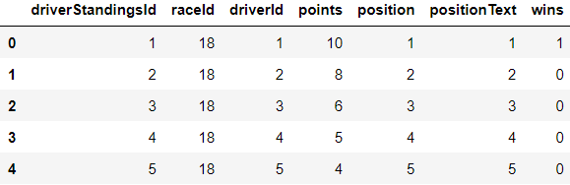

`driverStandingsId` is an auto-increment primary key that ranks each driver by points in each race.

This table also has columns `points` and `wins`. It can be assumed that more wins and points lead to a higher position.

lap_times_mod
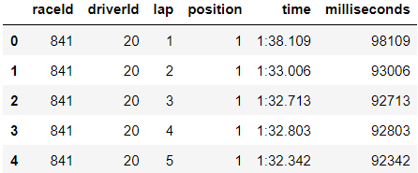

This table shows all the lap numbers, race positions, and lap times of the driver in each race.

The column `time` and `position` can be used to predict driver standings position.

pit_stops_mod
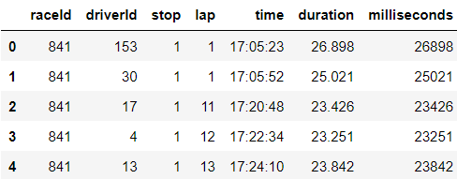

This table shows the number of pit stops made, lap number, and pit stop duration of all drivers in each race.

How often a driver stops, and the pit stop duration can be used to calculate the race completion time, which can be used to predict the driver standings position.

## 2.3 Formulate a prediction problem <a id = "r2.3"></a>

As such, driver standings position can be predicted using the columns `points` and `wins` from driver_standings, `time` and `position` from lap_times, and `stop` and `duration` from pit_stops.

To do this, we can use `position` from driver_standings as the target column and the others as the training columns.

# 3. Data Wrangling on multiple tables <a id = "r3"></a>
[Back to top](#r)

## 3.1 Extract and create features from different tables <a id = "r3.1"></a>
[Back to top](#r)

A new column called `lap_time(s)` can be created in lap_times using the column `milliseconds` after merging.

Similarly, a new column called `pit_stop_duration(s)` can be created in pit_stops using the column `milliseconds` after merging.

## 3.2 Concatenate/Merge/Join tables <a id = "r3.2"></a>
[Back to top](#r)

All 3 tables share columns `raceId` and `driverId`. As such, all 3 tables are mergable based on those columns.

First, driver_standings was merged with lap_times: `df_1 = pd.merge(driver_standings, lap_times, on = ["raceId", "driverId"], how = "inner").drop_duplicates()`

Next, pit_stops was merged: `df_2 = pd.merge(df_1, pit_stops, on = ["raceId", "driverId"], how = "inner").drop_duplicates()`

An inner join was used to avoid creating new null values to remove.

`.drop_duplicates()` was added because duplicates may be created when merging tables.

Redundant columns `positionText`, `time_x`, `duration`,  were removed.

Columns like `driverStandingsId`, `raceId`, and `driverId` are removed as they are categorical in nature.

Columns `lap_x`, `lap_y`, and `time_y` are removed because they are unimportant factors affecting points.

Some column names are shared between the tables. As such, some columns had to be renamed.
- `position_x` $\rightarrow$ `driver_standings_position`
- `position_y` $\rightarrow$ `race_position`
- `milliseconds_x` $\rightarrow$ `lap_time(ms)`
- `milliseconds_y` $\rightarrow$ `pit_stop_duration(ms)`

As mentioned in previously, new columns called `lap_time(s)` and `pit_stop_duration(s)` were created using the columns `lap_time(ms)` and `pit_stop_duration(ms)`. This was done by dividing the values by 1000.

# 4. Data Cleansing and Transformation <a id = "r4"></a>
[Back to top](#r)

## 4.1 Missing value and outliers <a id = "r4.2"></a>
[Back to top](#r)

`.info()` was used on the table to view the number of rows and data types of each column.

`.isnull().any()` was used to check for null values.

It was observed that `points` contained null values. The null values were replaced with 0's using `df_2['points'] = df_2['points'].fillna(0)`.

An issue occured when trying to convert the column data type of `points` from string to numerical. It was observed that some 0's in the column were O's. To resolve this, the O's had to be converted to 0's followed by changing the column data type. 

This was accomplished using 
1. `df_2['points'] = df_2['points'].replace("O", 0)`
2. `df_2["points"] = df_2["points"].astype(float)`

Removing outliers is important because they can affect the accuracy of the machine learning model.

2 outlier removal methods were experimented:
- Outlier trimming
- Winsorisation

Trimming outliers gave better naive baseline model scores but worser linear regression model scores.

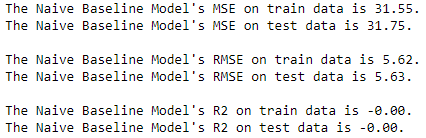

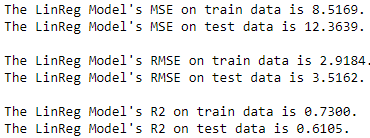

In winsorisation, there was no difference in scores from both models.

## 4.2 Categorical data <a id = "r4.3"></a>
[Back to top](#r)

Since no categorical columns were used, one-hot encoding, ordinal encoding, target mean encoding, and rare grouping encoding were not used.

## 4.3 Numerical data <a id = "r4.3"></a>
[Back to top](#r)

Before the transformation, the diagnostic plot shows the data distribution of each numerical column. This is shown via a histogram, a Q-Q plot, and a box plot. An important thing to note is that the red line in the Q-Q plot represents a normal distribution. 

It is observed that most columns are right-skewed, do not follow a normal distribution, and have multiple outliers.

Transformers are used to clean, reduce, expand, or generate new features from the data.

5 transformations were experimented:
- ReciprocalTransformer
- LogarithmTransformer
- BoxCoxTransformer
- YeoJohnsonTransformer
- PowerTransformer

PowerTransformer was used in this workbook. 

With regards to this, 2 different methods were experimented:
- Square root
- Cube root

Square root was chosen for this notebook.

After the transformation, most columns became less skewed, more normally distributed, and have fewer outliers.

LogarithmTransformer, BoxCoxTransformer, and ReciprocalTransformer return errors because of 0's or negative numbers.

YeoJohnsonTransformer returns the same scores for the naive baseline model. And for the linear regression model, it gave a better train score but worser test score.
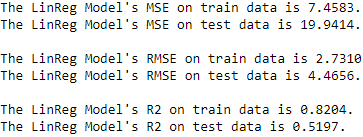

Similar to YeoJohnsonTransformer, cube root returns the same scores for the naive baseline model. And for the linear regression model, it returns a better train score but worser test score.
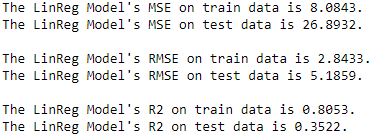

## 4.4 Binning / Discretiser <a id = "r4.4"></a>
[Back to top](#r)

Binning is important as it converts continuous data into discrete data. This can improve model quality and reduce processing time. It can also help identify outliers and missing values.

2 ways of binning were explored:
- EqualFrequencyDiscretiser
- EqualWidthDiscretiser

EqualFrequencyDiscretiser was used in this workbook.

The bar charts show the percentage of values in each bin. The blue bars represent the train data, and the orange bars represent the test data.

For the bar graphs for `points` and `race_position`, it is observed that the last bar is significantly higher than the others. This could imply that the other bars are outliers.

And in the bar graphs for `lap_time(s)` and `pit_stop_duration(s)`, it is observed that only the last bar has values. This could imply that all the values are in the last bin or there are missing values in the other bins.

EqualWidthDiscretiser gave the same naive baseline model scores but gave worser linear regression model scores.

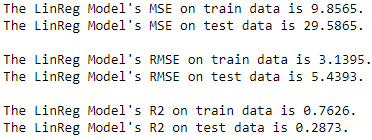

## 4.5 Feature Engineering <a id = "r4.5"></a>
[Back to top](#r)

For feature engineering, 5 methods were explored:
- Mean normalisation
- Standardisation
- Maximum absolute scaling
- MinMax scaling
- Robust scaling

Mean normalisation was used in this notebook.

Each numerical column has its own units, hence they cannot be plotted on the same graph. As such, scaling is done to convert the values into their z-values which makes it possible to plot them together.

The plot shows the density of values for each numerical column before and after scaling.

For the other 4 methods, they gave similar naive baseline model and linear regression model scores.

## 4.6 PCA Analysis <a id = "r4.6"></a>
[Back to top](#r)

`print(len(pca.explained_variance_ratio_))` shows the number of columns present. In this case, it shows that there are 6 columns: `points`, `wins`, `race_position`, `stop`, `lap_times(s)`, and `pit_stop_duration(s)`.

`print(pca.explained_variance_ratio_)` shows the variance in each column. In this case, it shows that `points` has a variance of 0.37, 0.21 in `wins`, 0.15 in `race_position`, 0.12 in `stop`, 0.08 in `lap_times(s)`, and 0.06 in `pit_stop_duration(s)`.

The line chart shows that as the number of components / columns increases, the percentage of variance observed decreases.

# 5. Machine Learning Modelling <a id = "r5"></a>
[Back to top](#r)

## 5.1 Final row and column count <a id = "r5.1"></a>
[Back to top](#r)

The final row and column count for the train and test sets are:

final_X_train (355440, 6)

final_X_test (152332, 6)

## 5.2 Naive Baseline Model <a id = "r5.2"></a>
[Back to top](#r)

The target value is the mean of the target column. In this case, the target value for `driver_standings_position` is 11.14.

The target value is then compared with the final y_train and y_test.

For MSE, a lower score is better, with 0 being the best.

The Naive Baseline Model's MSE on train data is 41.52.
The Naive Baseline Model's MSE on test data is 41.52.

The Naive Baseline Model's RMSE on train data is 6.44.
The Naive Baseline Model's RMSE on test data is 6.44.

For R2 value, 1 is the best score.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.

## 5.3 Linear Regression Model <a id = "r5.3"></a>
[Back to top](#r)

A linear regression model is fitted using data from the final X_train set and y_train set.

y_train and y_test will then be compared with the final X_train and final X_test respectively.

For MSE, a lower score is better, with 0 being the best.

The LinReg Model's MSE on train data is 8.3910.
The LinReg Model's MSE on test data is 11.8470.

The LinReg Model's RMSE on train data is 2.8967.
The LinReg Model's RMSE on test data is 3.4420.

For R2 value, 1 is the best score.

The LinReg Model's R2 on train data is 0.7979.
The LinReg Model's R2 on test data is 0.7146.

# 6. Summary <a id = "r6"></a>
[Back to top](#r)

## 6.1 Summarise findings <a id = "r6.1"></a>
[Back to top](#r)

Some transformations were effective, while some were not. And some changed the machine learning model scores while some did not.

Outlier removal did not provide better scores.

EqualWidthDiscretiser gave the same naive baseline model scores but gave worser linear regression model scores.

Different scalers did not provide better scores.

## 6.2 Explain possible future improvements <a id = "r6.2"></a>
[Back to top](#r)

It was observed that using different columns as the target column gave differing machine learning model scores.

A different value based problem statement was used before the current one. The target column made use of `lap_time(s)`. The scores generated were 5 digits long instead of the current 2 digit scores. As such, it can be theorised that using different target columns can yield different scores. However, this has not been explored.

# End of Notebook
[Back to beginning](#toc)